# Intro to Data Science: Final Project

## Introduction

<p>With this dataset being randomly generated I will be going in blind as to which machine learning algorithyms to apply. This will be fun to see what sort of data processing will be required since with the datasets before they were relatively clean. With the data being random it will be important to look for values that are placeholders for NaN.</p>

We begin by importing packages we will need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV ,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


## Read the data

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Sambusane/CST383csumb/main/Samuel.csv")

## Initial data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      6863 non-null   object 
 1   x1      6863 non-null   object 
 2   x2      6713 non-null   float64
 3   x3      6863 non-null   object 
 4   x4      6863 non-null   object 
 5   x5      6863 non-null   object 
 6   x6      6483 non-null   object 
 7   x7      6863 non-null   object 
 8   x8      6266 non-null   object 
 9   x9      6863 non-null   object 
 10  x10     6863 non-null   object 
 11  x11     6863 non-null   float64
 12  x12     6863 non-null   float64
 13  y       6863 non-null   object 
dtypes: float64(3), object(11)
memory usage: 750.8+ KB


In [4]:
df.isna().sum()

x0       0
x1       0
x2     150
x3       0
x4       0
x5       0
x6     380
x7       0
x8     597
x9       0
x10      0
x11      0
x12      0
y        0
dtype: int64

<p>Here I am looking for obvious NaN values in the data frame. In the columns x2, x6, x8 we can see missing values.</p>

In [5]:
df.describe()

x2          x11          x12
count  6713.000000  6863.000000  6863.000000
mean     32.391628    64.787739  2282.055705
std      24.580665    30.103264  2266.729011
min       0.000000    18.250000     0.000000
25%       9.000000    35.475000   399.800000
50%      29.000000    70.350000  1398.600000
75%      55.000000    89.900000  3798.375000
max      72.000000   118.750000  8684.800000

<p>Looking at the numeric columns there does not seem to be any outliers in the columns</p>

<p>Looking at the information given about the data set we can see the the x2, x6, and the x8 column are missing values. In the next step we will take a closer look at those columns and try to fix that.</p>

## Data preprocessing

In [6]:
x2_median=df['x2'].median()

<p>Seeing as the column x2 is a float we will use the median value to fill the empty spots in the column.</p>

In [7]:
df['x6'].mode()

0    A0
dtype: object

In [8]:
df['x8'].mode()

0    A0
dtype: object

<p>For x6 and x8 we will use the mode to fill the empty values in the array. We use the mode because these two columns are categorical. </p>

In [9]:
df['x2'].fillna(x2_median,inplace=True)

In [10]:
df['x6'].fillna('A0', inplace=True)

In [11]:
df['x8'].fillna('A0', inplace=True)

<p>Now that we have filled those values, we can check the dataframe to make sure those changes went through.</p>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      6863 non-null   object 
 1   x1      6863 non-null   object 
 2   x2      6863 non-null   float64
 3   x3      6863 non-null   object 
 4   x4      6863 non-null   object 
 5   x5      6863 non-null   object 
 6   x6      6863 non-null   object 
 7   x7      6863 non-null   object 
 8   x8      6863 non-null   object 
 9   x9      6863 non-null   object 
 10  x10     6863 non-null   object 
 11  x11     6863 non-null   float64
 12  x12     6863 non-null   float64
 13  y       6863 non-null   object 
dtypes: float64(3), object(11)
memory usage: 750.8+ KB


In [13]:
df.nunique()

x0     6863
x1        2
x2       73
x3        2
x4        4
x5        3
x6        3
x7        3
x8        3
x9        2
x10       4
x11    1576
x12    6373
y         2
dtype: int64

<p>Taking a look at our unique values by column we can see that columns x4 and x10 have 4 categorical values so I will take a closer look to see if there are any filler values.</p>

In [14]:
df['x4'].value_counts()

A0         3015
A1         2352
A2         1486
unknown      10
Name: x4, dtype: int64

In [15]:
df['x10'].value_counts()

A3    2303
A1    1569
A2    1503
A0    1488
Name: x10, dtype: int64

<p>Taking a closer look at column x4 we can see there is a value of 'unknown' we are going to replace this with the mode of x4. In x10 we can see that there is a forth categorical value of A3 and that is fine since it is not a filler value.</p>

In [16]:
df['x4'].mode()

0    A0
dtype: object

In [17]:
df[df.eq("unknown").any(1)]

x0  x1    x2  x3       x4  x5  x6  x7  x8  x9 x10     x11      x12  \
135    A135  A0  26.0  A0  unknown  A1  A2  A2  A2  A0  A0   19.15   515.75   
793    A793  A1  67.0  A0  unknown  A0  A1  A1  A0  A0  A0  102.95  6886.25   
1356  A1356  A1  45.0  A0  unknown  A0  A0  A1  A0  A0  A0   89.30  4016.85   
1753  A1753  A1  72.0  A0  unknown  A0  A1  A0  A2  A0  A0   84.10  6129.65   
2490  A2490  A1  54.0  A0  unknown  A2  A1  A0  A2  A0  A2   95.10  5064.85   
2514  A2514  A0  12.0  A0  unknown  A2  A0  A0  A0  A0  A2   79.95  1043.40   
4085  A4085  A0  29.0  A0  unknown  A0  A1  A0  A0  A0  A2   93.25  6669.45   
4320  A4320  A1  14.0  A0  unknown  A1  A2  A2  A2  A1  A1   18.80   255.55   
4447  A4447  A0   7.0  A0  unknown  A2  A0  A0  A0  A1  A0   69.70   516.15   
6533  A6533  A0  60.0  A0  unknown  A2  A1  A0  A2  A1  A0  101.15  6067.40   

       y  
135   A0  
793   A1  
1356  A1  
1753  A0  
2490  A0  
2514  A0  
4085  A0  
4320  A0  
4447  A0  
6533  A0

In [18]:
df.replace('unknown','A0',inplace=True)

In [19]:
df['x4'].value_counts()

A0    3025
A1    2352
A2    1486
Name: x4, dtype: int64

<p>Now that we have the NaN/unknown values filled we can go ahead and begin exploring the data and creating some visualizations.</p>

## Data visualization

<p>Since I only had three numeric columns I want to do a scatter plot of two of the columns just to see what the data looks like. </p>

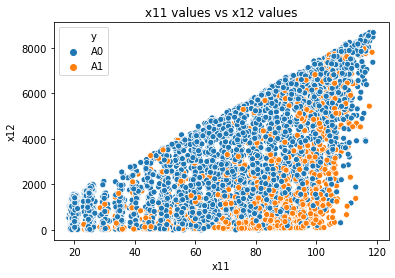

In [20]:
sns.scatterplot(x='x11',y='x12',data=df, hue="y").set_title("x11 values vs x12 values");

<p>There is a clear linear rise to these columns but what we can learn from this is there is a small grouping of A1 values when x11 is larger and x12 is smaller</p>

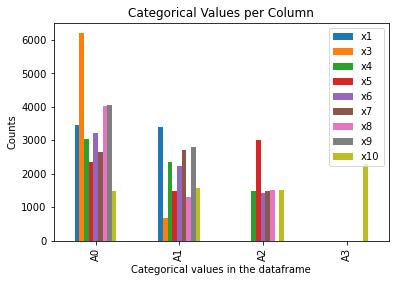

In [21]:
group_categorical=['x1','x3','x4','x5','x6','x7','x8','x9','x10']
ax=df[group_categorical].apply(pd.Series.value_counts).plot.bar();
ax.set_xlabel("Categorical values in the dataframe")
ax.set_ylabel("Counts")
ax.set_title("Categorical Values per Column");

<p>In this graph I wanted to see which categorical value appeared the most in the dataframe columns. From the graph we can tell that A0 appears in all the categorical columns while A3 only appears in one. </p>

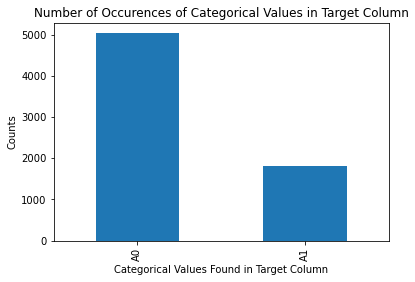

In [22]:
ax1=df['y'].value_counts().plot.bar()
ax1.set_xlabel("Categorical Values Found in Target Column")
ax1.set_ylabel("Counts")
ax1.set_title("Number of Occurences of Categorical Values in Target Column");

<p>This graph is just to show the values in the target column and to give a general idea of which value shows up the most often in our case the value that shows up the most is A0. </p>

## Machine learning

<h4>Since our target is a categorical value we will build a KNNClassifier Model and a Logistic Regression model.</h4>

<h5>KNearestNeighbor</h5>

<p>Starting off where are going to create our training and testing data then we will run an function that will show us the best value for number of neighbors.</p>

In [23]:
df_dummies=pd.get_dummies(df, columns=['x1','x3','x4','x5','x6','x7','x8','x9','x10','y'], drop_first=True)
y=df_dummies['y_A1'].values
df_dummies.drop(['x0','y_A1'],axis=1,inplace=True)
scale=StandardScaler()
X=scale.fit_transform(df_dummies.values)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

<p>One of the first things we need to do with the data set is to set the values to numeric. This is accomplished by using Pandas get_dummies to replace categorical values with 0's or 1's. I will also drop x0 because this seems to be the index and will create unneccessary dummy variables that are not needed. I then scaled the data and created the train/test set. An Important thing to note is that y has been changed to be 0 when y=A0 and 1 when y=A1.</p>

In [24]:
param_grid = {'n_neighbors': np.arange(1, 10)}
knn_grid = GridSearchCV(knn, param_grid, cv=5)
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [25]:
knn_grid.best_params_

{'n_neighbors': 6}

<p>Above I ran a gridsearch to find the best Hyper Parameters for our KNN classifier model. In this case n_neighbors should be set to 6</p>

In [26]:
best_knn=KNeighborsClassifier(n_neighbors=6)
best_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [27]:
scores = cross_val_score(best_knn, X, y, scoring='accuracy', cv=10)

In [28]:
y_base=best_knn.predict(X_train)
base_accuracy=(y_base==y_train).mean()
print("Baseline Accuracy: "+str(base_accuracy))
y_predictions=best_knn.predict(X_test)
print("Accuracy: "+str(scores.mean()))

Baseline Accuracy: 0.8249544626593807
Accuracy: 0.7767763250028645


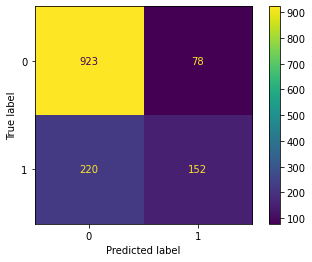

In [29]:
plot_confusion_matrix(best_knn,X_test,y_test);

<p>For our Confusion Matrix we can see be got a decent amount of the predictions correct. In this case we had a precision of .66 and a recall of .41. </p>

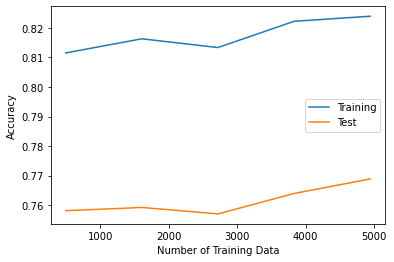

In [30]:
train_size,train_score,test_score=learning_curve(best_knn,X_train,y_train,cv=10,scoring="accuracy")
train_mean=np.mean(train_score,axis=1)
train_std=np.std(train_score,axis=1)
test_mean=np.mean(test_score,axis=1)
test_std=np.std(test_score,axis=1)

plt.plot(train_size, train_mean,label="Training")
plt.plot(train_size, test_mean,label="Test")
plt.legend()
plt.xlabel("Number of Training Data")
plt.ylabel("Accuracy");

<p>Looking at our Learning curve we can see the test is increasing as more data is added but there is a gap between the training data so large I believe there is some underfitting going on.</p>

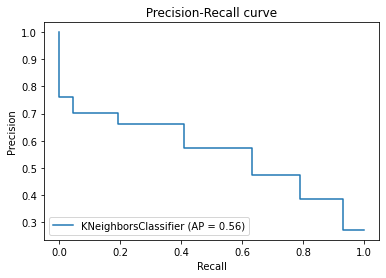

In [31]:
disp = plot_precision_recall_curve(best_knn, X_test, y_test)
disp.ax_.set_title(' Precision-Recall curve ');

<p>With this Precision-Recall Curve I would say the ideal threshold is the threshhold at approximetely [0.4,0.65]</p>

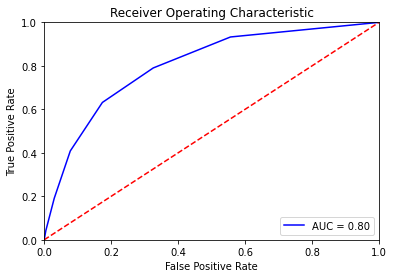

In [32]:
probs=best_knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<p>Looking at this ROC curve the ideal threshold would be around [0.4,0.8]</p>

<h4>KNN Summary</h4>

<p>To briefly summarize our KNN model, we found the best number of neighbors to be 6 and that yielded us an accuracy around 0.77. Also looking at the Learning Curve it seem this model is underfitted.</p>

<h4>Logistic Regression</h4>

<p>To start things off I want to use Forward Feature selection to find the ten best features to use for the model</p>

In [33]:
def forward_feature_selection(x_t,y_t):
    remaining = list(range(x_t.shape[1]))
    selected = []
    n = 10
    while len(selected) < n:
    # find the single features that works best in conjunction
    # with the already selected features
        rmse_min = 0
        for i in remaining:
            X_i = x_t[:,selected+[i]]
            scores = cross_val_score(LogisticRegression(), X_i, y_t,scoring="accuracy", cv=10)
            rmse =scores.mean()
            if rmse > rmse_min:
                rmse_min = rmse
                i_min = i
       	 
        remaining.remove(i_min)
        selected.append(i_min)
        print('num features: {}; accuracy: {:.3f}'.format(len(selected), rmse_min))
    return selected

In [34]:
best_array=forward_feature_selection(X_train,y_train)

num features: 1; accuracy: 0.736
num features: 2; accuracy: 0.785
num features: 3; accuracy: 0.786
num features: 4; accuracy: 0.787
num features: 5; accuracy: 0.786
num features: 6; accuracy: 0.788
num features: 7; accuracy: 0.792
num features: 8; accuracy: 0.794
num features: 9; accuracy: 0.794
num features: 10; accuracy: 0.794


In [35]:
predictors=df_dummies.columns
feature_names = []
for i in best_array:
    feature_names.append(predictors[i])
print(feature_names)

['x11', 'x12', 'x6_A2', 'x1_A1', 'x10_A2', 'x4_A1', 'x10_A3', 'x3_A1', 'x2', 'x9_A1']


<p>Now that we have our ten best features lets build the Logistic Regression model using the ten best features. The reason I went to three decimal places because I wanted to see a more accurate increase in accuracy score.</p>

In [36]:
X2=df_dummies[predictors].values
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y,test_size=0.40,random_state=42)
log=LogisticRegression()
log.fit(X2_train,y2_train)

LogisticRegression()

In [37]:
scores2 = cross_val_score(log, X2, y, scoring='accuracy', cv=10)

In [38]:
y_base2=log.predict(X2_train)
base_accuracy2=(y_base2==y2_train).mean()
print("Baseline Accuracy: "+str(base_accuracy2))
y_predictions2=log.predict(X2_test)
print("Accuracy: "+str(scores2.mean()))

Baseline Accuracy: 0.7981539956278844
Accuracy: 0.7983358159233749


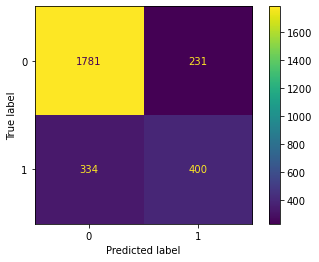

In [39]:
plot_confusion_matrix(log,X2_test,y2_test);

<p>Looking at this confusion matrix we can see we have similar results to the previous model. We have a Precision of .63 and a recall of .54.</p>

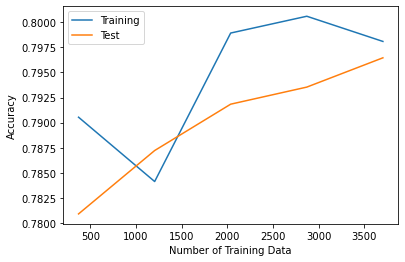

In [40]:
train_size2,train_score2,test_score2=learning_curve(log,X2_train,y2_train,cv=10,scoring="accuracy")
train_mean2=np.mean(train_score2,axis=1)
train_std2=np.std(train_score2,axis=1)
test_mean2=np.mean(test_score2,axis=1)
test_std2=np.std(test_score2,axis=1)

plt.plot(train_size2, train_mean2,label="Training")
plt.plot(train_size2, test_mean2,label="Test")
plt.legend()
plt.xlabel("Number of Training Data")
plt.ylabel("Accuracy");

<p>Looking at this Learning Curve we can see that the model is learning with the rise in accuracy on the test data with the increase of training data. </p>

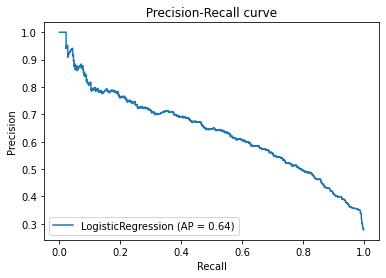

In [41]:
disp2 = plot_precision_recall_curve(log, X2_test, y2_test)
disp2.ax_.set_title(' Precision-Recall curve ');

<p>Looking at the Precision-Recall Curve for our Logistic Regression Model we can see that the ideal threshold would be around [0.53,0.69].</p>

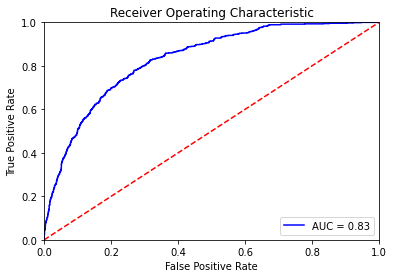

In [42]:
probs=log.predict_proba(X2_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y2_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<p>Looking at the ROC graph we can see that the ideal threshold is around [0.24,0.78]</p>

## Conclusions

<p>After going over the dataset, the model I would choose is the Logistic Model. The reason for this choice is the Logistic Regression model gave us a higher accuracy with a higher recall than the KNN model. In this dataset the values are all randomly generated so they do not hold any real world weight, but in a real world case having false negatives can have a dire outcome. Overall this project helped me understand Machine Learning a lot. Before I just knew how to apply the machine learning algorithms, but with this dataset being random it made me dive deeper into what is actually happening and gave me a better understanding of all the tools we learned over the semester.</p>